In [8]:
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap

In [9]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

In [ ]:
image_shape = people.images[0].shape
image_shape

In [ ]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

In [ ]:
people.target[:10]

In [ ]:
people.target_names

In [ ]:
people.data.shape

In [ ]:
people.target_names[people.target[0]]

In [ ]:
fig, axes = plt.subplots(3,5,figsize=(15, 8),subplot_kw=dict(xticks=[], yticks=[]))

In [ ]:
fig, axes = plt.subplots(3,5,figsize=(15, 8),subplot_kw=dict(xticks=[], yticks=[]))
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image, cmap='gray')
    ax.set_title(people.target_names[target])

In [ ]:
counts = np.bincount(people.target)
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end=' ')
    if (i + 1) % 3 == 0:
        print()

In [ ]:
pca = PCA(n_components=150).fit(people.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('n components')
plt.ylabel('cumulative variance');

In [10]:
pca = PCA(n_components=100, whiten=True, random_state=0)
X_scaled = people.data/255.
X_pca = pca.fit_transform(X_scaled)
print("X_train_pca.shape: {}".format(X_pca.shape))


X_train_pca.shape: (3023, 100)


In [ ]:
X_recovered = pca.inverse_transform(X_pca)
X_recovered = X_recovered * 255.
images_recovered = [image.reshape(image_shape) for image in X_recovered]

In [ ]:
fig, axes = plt.subplots(3,5,figsize=(15, 8),subplot_kw=dict(xticks=[], yticks=[]))
for target, image, ax in zip(people.target, images_recovered, axes.ravel()):
    ax.imshow(image, cmap='gray')
    ax.set_title(people.target_names[target])

In [11]:
tsne = TSNE(random_state=42)
img_tsne = tsne.fit_transform(people.data)

In [ ]:
img_tsne.shape

In [ ]:
img_tsne[:,0]

In [ ]:
img_tsne[:,0].min(),img_tsne[:,0].max()

In [12]:
def display_2d_component_names(model,selected,dataobj):
    colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525","#A83683", "#4E655E", "#853541",
          "#3A3120", "#535D8E"]
    plt.figure(figsize=(14, 14))
    plt.xlim(model[:, 0].min(), model[:, 0].max() + 1)
    plt.ylim(model[:, 1].min(), model[:, 1].max() + 1)
    for i in range(len(dataobj.data)):
        cindex = dataobj.target[i]%len(selected)
        if dataobj.target[i] not in selected:
            continue
        plt.text(model[i, 0], model[i, 1], str(dataobj.target_names[dataobj.target[i]]),
                 color = colors[cindex],fontdict={'weight': 'bold', 'size': 9})
    plt.xlabel("model feature 0")
    plt.ylabel("model feature 1")


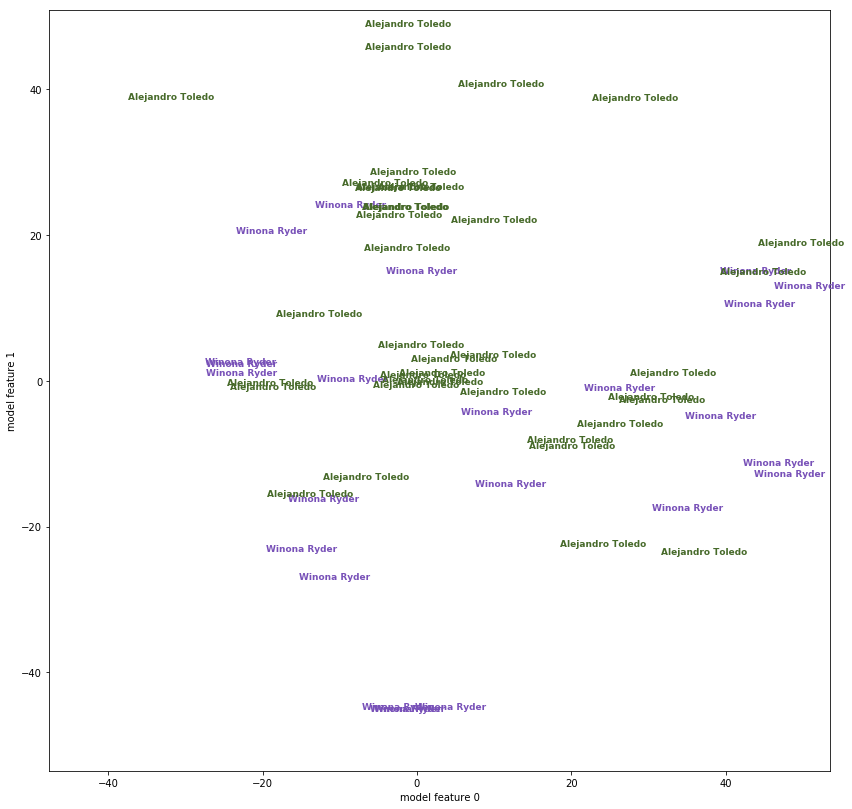

In [13]:
display_2d_component_names(img_tsne,(0,61),people)

In [ ]:
iso = Isomap(n_components=2)
img_iso = iso.fit_transform(people.data)

In [ ]:
display_2d_component_names(img_iso,(0,1),people)

PCA,TSNE and ISOMAP on MNIST DIGITS

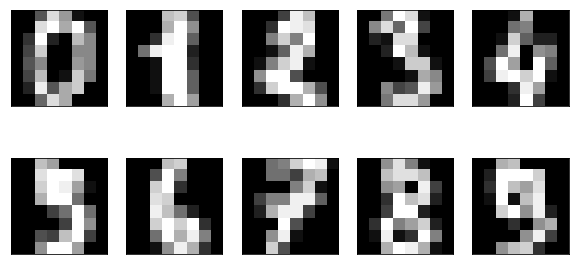

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
fig, axes = plt.subplots(2, 5, figsize=(10, 5),
subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img,cmap=cm.gray)

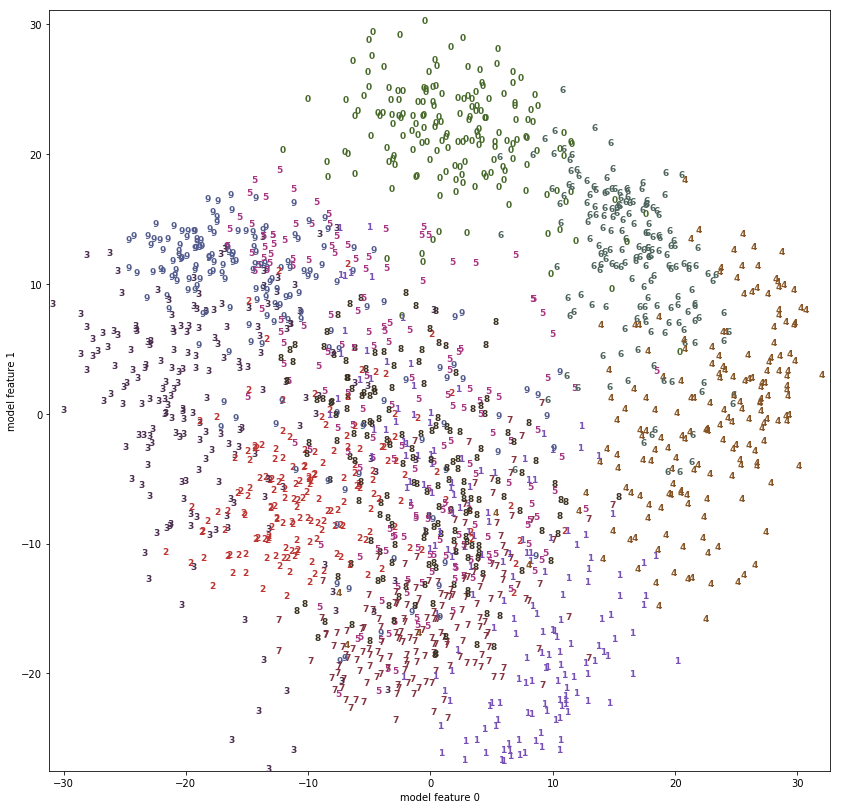

In [7]:
pca = PCA(n_components=2)
pca.fit(digits.data)
digits_pca = pca.transform(digits.data)
display_2d_component_names(digits_pca,(0,1,2,3,4,5,6,7,8,9),digits)

In [14]:
tsne = TSNE(random_state=42)
digits_tsne = tsne.fit_transform(digits.data)



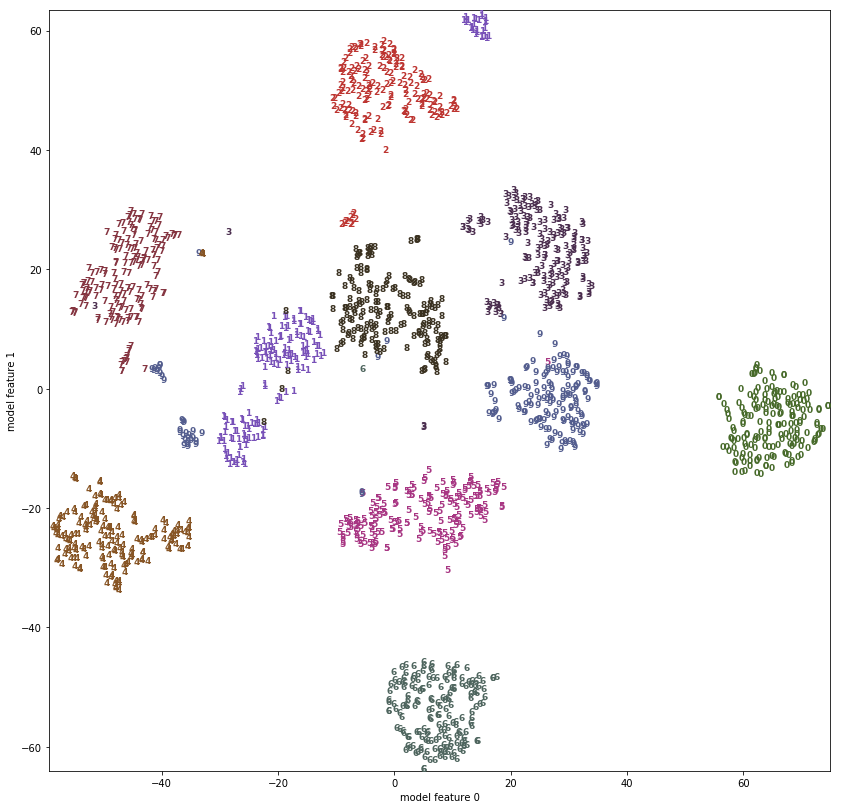

In [15]:
display_2d_component_names(digits_tsne,(0,1,2,3,4,5,6,7,8,9),digits)

In [ ]:
iso = Isomap(n_neighbors=10, n_components=2)
digits_iso = iso.fit(digits.data).transform(digits.data)


In [ ]:
display_2d_component_names(digits_iso,(0,1,2,3,4,5,6,7,8,9),digits)